## Sensitivity to Change in Price - BTC vs BCH vs ETH

In [28]:
# compare btc and eth from 2017-03-01 to 2019-03-31
# import btc dataset

import pandas as pd 
btc = pd.read_csv("Data/btc.csv")
btc.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,2009-01-03,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2009-01-04,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2009-01-05,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2009-01-06,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2009-01-07,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [29]:
btc_df = btc[(btc['date']>= '2017-04-01') & (btc['date'] <= '2019-03-31')][['date','PriceUSD','HashRate']]
btc_df

,date,PriceUSD,HashRate
3010,2017-04-01,1089.524772,3.278489e+06
3011,2017-04-02,1105.562956,3.924252e+06
3012,2017-04-03,1144.664771,4.371318e+06
3013,2017-04-04,1141.921919,3.104630e+06
3014,2017-04-05,1135.811644,4.023600e+06
...,...,...,...
3735,2019-03-27,4027.007918,4.725014e+07
3736,2019-03-28,4010.937462,4.629879e+07
3737,2019-03-29,4089.461040,4.661591e+07
3738,2019-03-30,4091.891038,4.407899e+07


In [30]:
# create a similar dataset for ethereum for the same time period

import pandas as pd 
eth = pd.read_csv("Data/eth.csv")
eth_df = eth[(eth['date']>= '2017-04-01') & (eth['date'] <= '2019-03-31')][['date','PriceUSD','HashRate']]
eth_df

,date,PriceUSD,HashRate
611,2017-04-01,50.685610,16.397249
612,2017-04-02,48.794262,16.376406
613,2017-04-03,44.124203,15.623869
614,2017-04-04,44.233471,16.520347
615,2017-04-05,45.345953,17.062749
...,...,...,...
1336,2019-03-27,139.215307,131.649967
1337,2019-03-28,137.336612,130.955276
1338,2019-03-29,142.368977,132.055429
1339,2019-03-30,142.107745,126.643179


In [31]:
# merge both datasets
merged_df = btc_df.merge(eth_df, on='date', how='left')
merged_df.rename(columns={"PriceUSD_x": "btc_price", "HashRate_x": "btc_hashrate", "PriceUSD_y":"eth_price", "HashRate_y":"eth_hashrate"},  inplace=True)
merged_df

,date,btc_price,btc_hashrate,eth_price,eth_hashrate
0,2017-04-01,1089.524772,3.278489e+06,50.685610,16.397249
1,2017-04-02,1105.562956,3.924252e+06,48.794262,16.376406
2,2017-04-03,1144.664771,4.371318e+06,44.124203,15.623869
3,2017-04-04,1141.921919,3.104630e+06,44.233471,16.520347
4,2017-04-05,1135.811644,4.023600e+06,45.345953,17.062749
...,...,...,...,...,...
725,2019-03-27,4027.007918,4.725014e+07,139.215307,131.649967
726,2019-03-28,4010.937462,4.629879e+07,137.336612,130.955276
727,2019-03-29,4089.461040,4.661591e+07,142.368977,132.055429
728,2019-03-30,4091.891038,4.407899e+07,142.107745,126.643179


In [32]:
# form 2 week aggregates
merged_df['date'] =  pd.to_datetime(merged_df['date'])
merged_df = merged_df.resample('2W-Wed', label='right', closed = 'right', on='date').mean().reset_index().sort_values(by='date')
merged_df

,date,btc_price,btc_hashrate,eth_price,eth_hashrate
0,2017-04-05,1123.497212,3.740458e+06,46.636700,16.396124
1,2017-04-19,1195.833404,3.710227e+06,46.327948,17.836694
2,2017-05-03,1333.142634,3.841484e+06,62.436665,20.813223
3,2017-05-17,1698.091867,4.208124e+06,88.568335,24.195947
4,2017-05-31,2166.200449,4.612566e+06,166.619774,29.324881
5,2017-06-14,2680.832264,5.077234e+06,287.524613,38.360706
6,2017-06-28,2568.663174,5.045947e+06,322.972093,49.599624
7,2017-07-12,2489.731067,5.636095e+06,252.611185,60.250623
8,2017-07-26,2438.909409,6.123240e+06,205.126556,66.907125
9,2017-08-09,2962.712583,6.548323e+06,233.049548,74.513364


In [33]:
# define growth rate for price and hashrate
tmp = merged_df
for i in range(1, tmp.shape[0]):
    
    tmp.loc[tmp.index[i], '%btc_change_price'] = ((tmp['btc_price'].iloc[i] - tmp['btc_price'].iloc[i-1])/(tmp['btc_price'].iloc[i-1]))*100
    tmp.loc[tmp.index[i], '%btc_change_hashrate'] = ((tmp['btc_hashrate'].iloc[i] - tmp['btc_hashrate'].iloc[i-1])/(tmp['btc_hashrate'].iloc[i-1]))*100
    
    tmp.loc[tmp.index[i], '%eth_change_price'] = ((tmp['eth_price'].iloc[i] - tmp['eth_price'].iloc[i-1])/(tmp['eth_price'].iloc[i-1]))*100
    tmp.loc[tmp.index[i], '%eth_change_hashrate'] = ((tmp['eth_hashrate'].iloc[i] - tmp['eth_hashrate'].iloc[i-1])/(tmp['eth_hashrate'].iloc[i-1]))*100
    
tmp

,date,btc_price,btc_hashrate,eth_price,eth_hashrate,%btc_change_price,%btc_change_hashrate,%eth_change_price,%eth_change_hashrate
0,2017-04-05,1123.497212,3.740458e+06,46.636700,16.396124,NaN,NaN,NaN,NaN
1,2017-04-19,1195.833404,3.710227e+06,46.327948,17.836694,6.438484,-0.808221,-0.662037,8.786044
2,2017-05-03,1333.142634,3.841484e+06,62.436665,20.813223,11.482304,3.537731,34.771059,16.687669
3,2017-05-17,1698.091867,4.208124e+06,88.568335,24.195947,27.375108,9.544204,41.853084,16.252764
4,2017-05-31,2166.200449,4.612566e+06,166.619774,29.324881,27.566741,9.610983,88.125670,21.197492
5,2017-06-14,2680.832264,5.077234e+06,287.524613,38.360706,23.757350,10.073968,72.563320,30.812828
6,2017-06-28,2568.663174,5.045947e+06,322.972093,49.599624,-4.184114,-0.616230,12.328503,29.297995
7,2017-07-12,2489.731067,5.636095e+06,252.611185,60.250623,-3.072887,11.695491,-21.785445,21.473951
8,2017-07-26,2438.909409,6.123240e+06,205.126556,66.907125,-2.041251,8.643304,-18.797516,11.048022
9,2017-08-09,2962.712583,6.548323e+06,233.049548,74.513364,21.476943,6.942132,13.612568,11.368355


In [35]:
# define hashrate sensitivity to price

tmp2 = tmp
for i in range(0, tmp2.shape[0]):
    
    tmp2.loc[tmp2.index[i], "btc_hashrate_sensitivity"] = tmp2['%btc_change_hashrate'].iloc[i]/tmp2['%btc_change_price'].iloc[i]
    tmp2.loc[tmp2.index[i], "eth_hashrate_sensitivity"] = tmp2['%eth_change_hashrate'].iloc[i]/tmp2['%eth_change_price'].iloc[i]    
tmp2

,date,btc_price,btc_hashrate,eth_price,eth_hashrate,%btc_change_price,%btc_change_hashrate,%eth_change_price,%eth_change_hashrate,btc_hashrate_sensitivity,eth_hashrate_sensitivity
0,2017-04-05,1123.497212,3.740458e+06,46.636700,16.396124,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-19,1195.833404,3.710227e+06,46.327948,17.836694,6.438484,-0.808221,-0.662037,8.786044,-0.125530,-13.271228
2,2017-05-03,1333.142634,3.841484e+06,62.436665,20.813223,11.482304,3.537731,34.771059,16.687669,0.308103,0.479930
3,2017-05-17,1698.091867,4.208124e+06,88.568335,24.195947,27.375108,9.544204,41.853084,16.252764,0.348645,0.388329
4,2017-05-31,2166.200449,4.612566e+06,166.619774,29.324881,27.566741,9.610983,88.125670,21.197492,0.348644,0.240537
5,2017-06-14,2680.832264,5.077234e+06,287.524613,38.360706,23.757350,10.073968,72.563320,30.812828,0.424036,0.424634
6,2017-06-28,2568.663174,5.045947e+06,322.972093,49.599624,-4.184114,-0.616230,12.328503,29.297995,0.147279,2.376444
7,2017-07-12,2489.731067,5.636095e+06,252.611185,60.250623,-3.072887,11.695491,-21.785445,21.473951,-3.806028,-0.985702
8,2017-07-26,2438.909409,6.123240e+06,205.126556,66.907125,-2.041251,8.643304,-18.797516,11.048022,-4.234317,-0.587738
9,2017-08-09,2962.712583,6.548323e+06,233.049548,74.513364,21.476943,6.942132,13.612568,11.368355,0.323237,0.835137


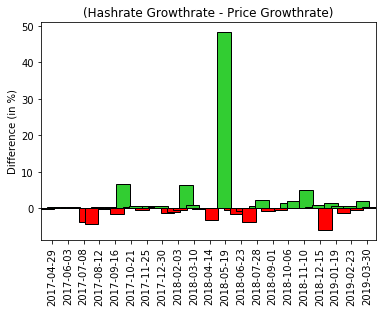

In [36]:
# plot hashrate sensitivity for bitcoin

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()

colors = []
diff_list = tmp2['btc_hashrate_sensitivity'].tolist()

diff_dict = {}
num = list(range(0,len(diff_list)))

alpha = 1

for i in num:
    diff_dict[i] = diff_list[i]

for value in diff_dict.keys():
    if diff_dict[value] < 0:
        colors.append('r')
    else:
        colors.append('limegreen')

ax.bar(tmp2['date'], tmp2['btc_hashrate_sensitivity'], width=30, edgecolor='black', color=colors, alpha=alpha)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=35))
ax.autoscale(enable=True, axis='x', tight=True)
#ax.set_facecolor('beige')
plt.xticks(rotation=90)

plt.title('(Hashrate Growthrate - Price Growthrate)')
plt.ylabel('Difference (in %)')
plt.show()

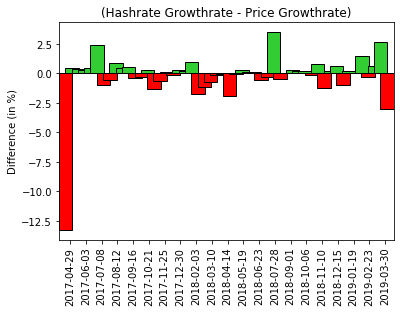

In [37]:
# plot hashrate sensitivity for ethereum

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()

colors = []
diff_list = tmp2['eth_hashrate_sensitivity'].tolist()

diff_dict = {}
num = list(range(0,len(diff_list)))

alpha = 1

for i in num:
    diff_dict[i] = diff_list[i]

for value in diff_dict.keys():
    if diff_dict[value] < 0:
        colors.append('r')
    else:
        colors.append('limegreen')

ax.bar(tmp2['date'], tmp2['eth_hashrate_sensitivity'], width=30, edgecolor='black', color=colors, alpha=alpha)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=35))
ax.autoscale(enable=True, axis='x', tight=True)
#ax.set_facecolor('beige')
plt.xticks(rotation=90)

plt.title('(Hashrate Growthrate - Price Growthrate)')
plt.ylabel('Difference (in %)')
plt.show()